# Capstone Activity

Scenario: Your supervisor asked you to conduct Exploratory Data Analysis on real data about food servers’ tips in restaurants and report to him your discoveries.


Task: Apply our framework of looking at distributions, compositions, relationships and comparisons in our data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")

References: Tips dataset. This data appeared at first time by Bryant, P. G. and Smith, M in Practical Data Analysis: Case Studies in Business Statistics. A data frame with 244 rows and 7 variables.

**Details of the dataset:**

- Tip in dollars

- Bill in dollars

- Sex of the bill payer

- Whether there were smokers in the party

- Day of the week

- Time of day

- Size of the party

In all it recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Distributions

Looking at the distribution of "tip" variable

<Axes: xlabel='tip', ylabel='Count'>

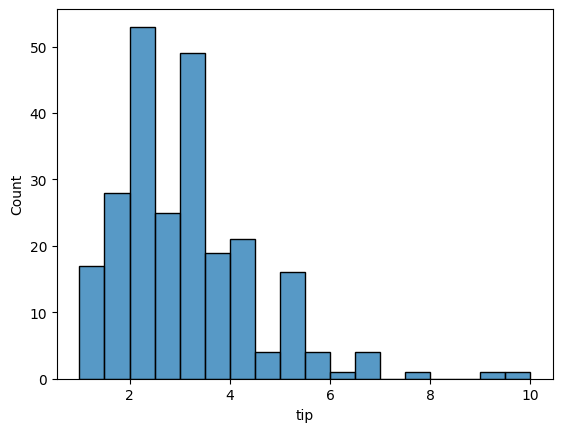

In [5]:
sns.histplot(data=tips, x="tip")

Here we are looking at the aggregated distribution. It seems ti be skewed to the right (the tale is on the right side). This means that most people give small tips in the resturant that the data was collected.  


Inspecting the "tips" variable distribution on different days

<Axes: xlabel='tip', ylabel='Count'>

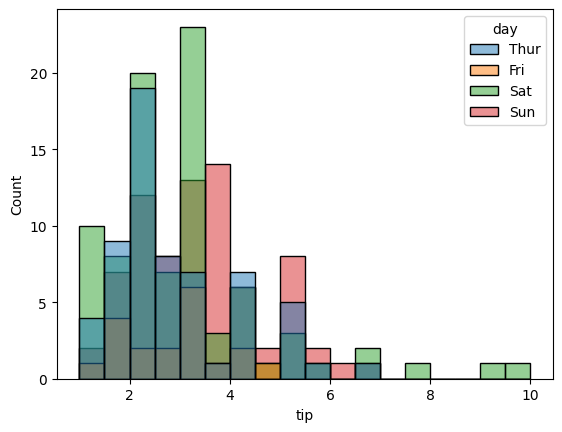

In [6]:
sns.histplot(data=tips, x="tip", hue="day")

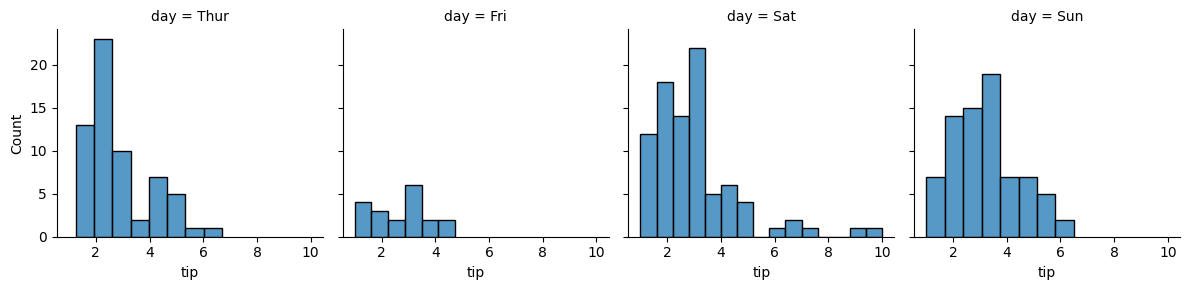

In [7]:
grid=sns.FacetGrid(data=tips, col="day")
grid.map_dataframe(sns.histplot, x="tip")

# **Inspecting outliers**

<Axes: xlabel='day', ylabel='tip'>

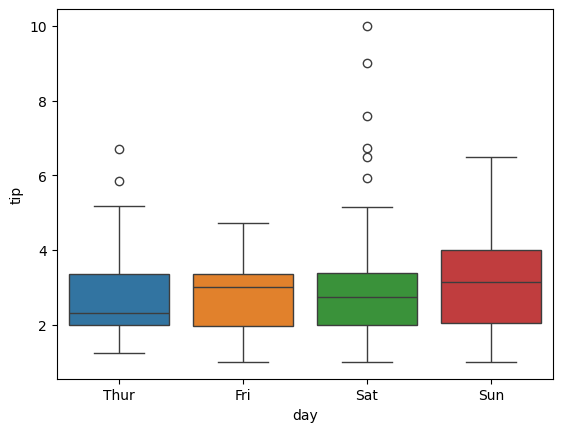

In [8]:
sns.boxplot(data=tips, x="day", y="tip", hue="day")

Here we can see that on Sunday the median value of the tips is the biggest among other days of week.

# **Combining box plot and historgam**

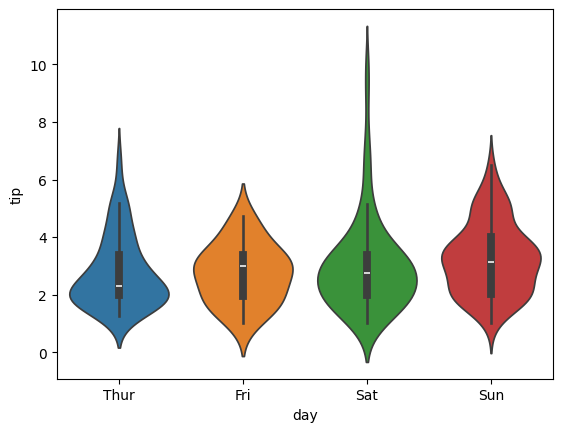

In [9]:
ax=sns.violinplot(data=tips, x="day", y="tip", hue="day")

We can see the shape and quartiles.

## Comparisons (plotting categorical data)

In the dataset there are more daya records fro men. That raises interesting questions on behavior:

***Is this resturant more visited by men or do men tip more?***

Text(0.5, 1.0, 'Bar chart of resturant visitors')

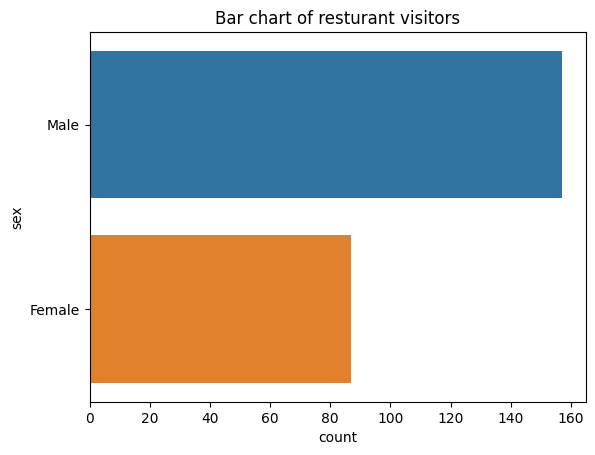

In [10]:
ax=sns.countplot(data=tips, y="sex", hue="sex")
ax.set_title("Bar chart of resturant visitors")

Here we can see that records for men are doubled

## Relationships

There is a correlation between larger total bills and large tips, but it is not perfecct linear. There are people who spend a lot and still give a small tip (the quadrant at the lpwer right side)

<Axes: xlabel='total_bill', ylabel='tip'>

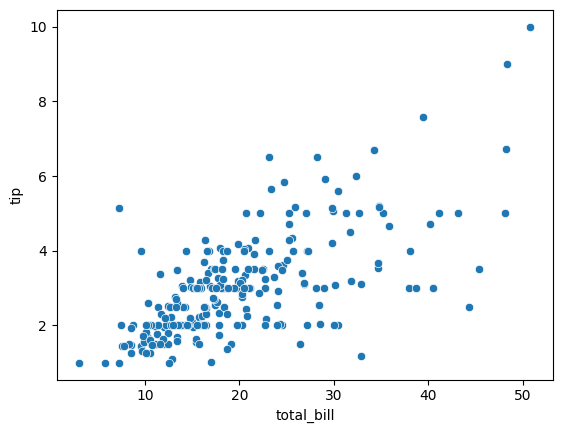

In [11]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

Here we can see sometimes customers who spent a lot payed less tip. Therefor it is not perfect correlation.

<Axes: xlabel='total_bill', ylabel='tip'>

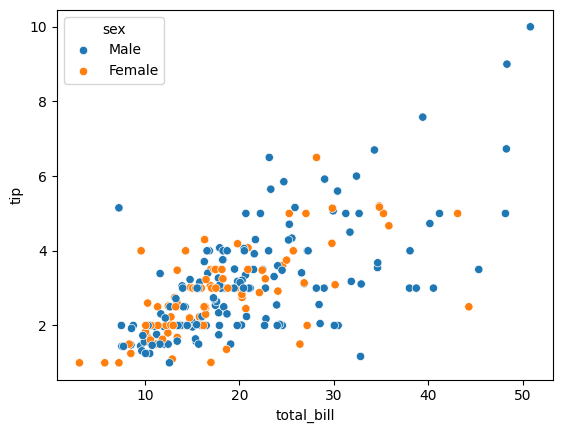

In [12]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")

We also see that women tend to pay smaller total bills.

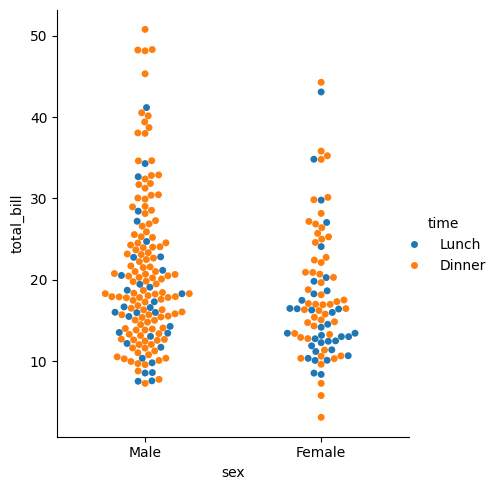

In [13]:
grid=sns.catplot(data=tips, x="sex", y="total_bill", hue="time", kind="swarm")
fig=grid.figure
fig.set_figwidth(5)

We also can interperate that men pay more frequently for the dinner (left swarm plot) and data shows a more balanced distribution on lunch.



## Compositions

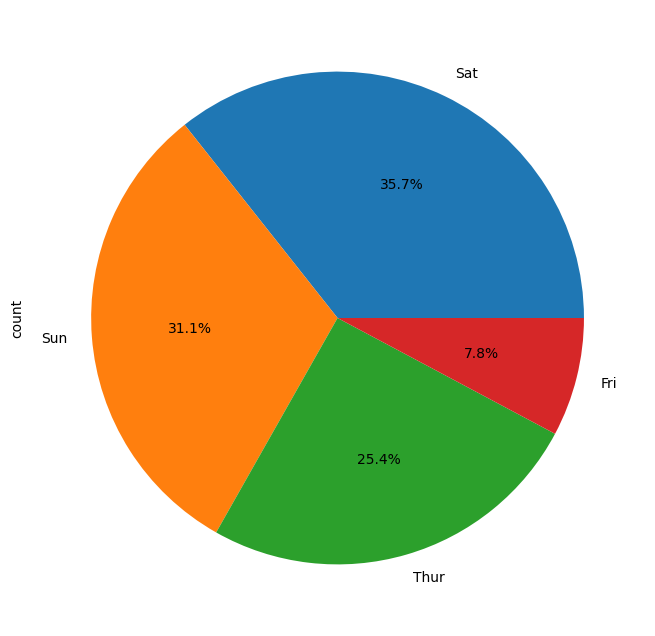

In [14]:
ax=tips['day'].value_counts().plot(kind='pie', autopct='%.1f%%',figsize=(10,8) )


We can observe that most of the tips are from Saturday, followed by Sunday. And the Friday is the smallest one.

# **Note**
Guided by João Vitor Boverio da Silva Gomes in Coursera.